In [ ]:
# !pip uninstall -y gensim numpy scipy
!pip install numpy==1.24.4 scipy==1.10.1 gensim==4.3.2

In [ ]:
import nltk
import gensim
import matplotlib.pyplot as plt
from nltk.corpus import movie_reviews, stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd

# Download NLTK resources
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Load movie reviews from NLTK
documents = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]

# Preprocessing: Tokenization, lowercasing, removing stopwords/non-alpha tokens
stop_words = set(stopwords.words('english'))

def preprocess(doc):
    tokens = word_tokenize(doc.lower())
    return [word for word in tokens if word.isalpha() and word not in stop_words]

tokenized_docs = [preprocess(doc) for doc in documents]


In [ ]:
model = Word2Vec(sentences=tokenized_docs, vector_size=100, window=5, min_count=5, workers=4, sg=1)  # sg=1: skip-gram
model.train(tokenized_docs, total_examples=len(tokenized_docs), epochs=10)

(6192297, 6787270)

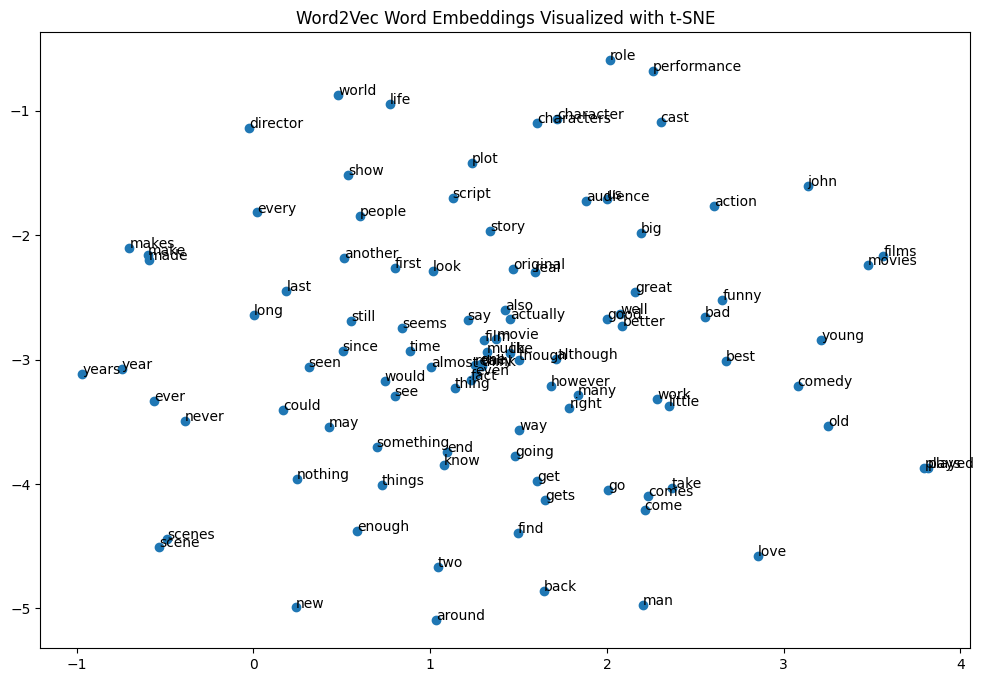

In [ ]:
import numpy as np

# Get 100 most frequent words
words = list(model.wv.index_to_key)[:100]
word_vectors = np.array([model.wv[word] for word in words])  # Convert to NumPy array

# Reduce dimensions with t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(word_vectors)

# Create DataFrame for visualization
df = pd.DataFrame(X_tsne, columns=['x', 'y'])
df['word'] = words

# Plot
plt.figure(figsize=(12, 8))
plt.scatter(df['x'], df['y'])

for i, word in enumerate(df['word']):
    plt.annotate(word, (df['x'][i], df['y'][i]))

plt.title('Word2Vec Word Embeddings Visualized with t-SNE')
plt.show()
